In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pickle


In [2]:
df = pd.read_csv('loan_data_set.csv')


In [3]:
loan=df.copy()

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
loan['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [6]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
loan['Education'].value_counts() 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
loan['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
loan['Gender'].replace(('Male','Female'),(1,2), inplace = True)
loan['Married'].replace(('Yes','No'),(1,0), inplace = True)
loan['Education'].replace(('Not Graduate','Graduate'),(0,1), inplace = True)
loan['Self_Employed'].replace(('No','Yes'),(0,1), inplace = True)
loan['Loan_Status'].replace(('N','Y'),(0,1), inplace = True)
loan['Dependents'].replace(('3+'),(3), inplace = True)

In [8]:
loan.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [9]:
median = loan["LoanAmount"].median()  
loan["LoanAmount"].fillna(median, inplace=True)

In [10]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)

loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)

loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)

loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)


In [11]:

loan['Dependents']= loan['Dependents'].astype(int)


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 52.9 KB


In [12]:
loan.drop(columns=['Loan_ID'], inplace=True)

In [13]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1


In [14]:
x= loan.drop("Loan_Status", axis=1)
y= loan["Loan_Status"].copy()


In [15]:
ds=y.value_counts().rename_axis("loan_status").reset_index(name="counts")
ds.head()

,loan_status,counts
0,1,422
1,0,192


([<matplotlib.patches.Wedge at 0x7f0ae5bc4b90>,
 [Text(-0.6105420895241798, 0.9150072988339757, '1'),
  Text(0.6105420038550106, -0.9150073559970479, '0')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.7%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.3%')])

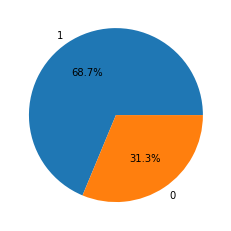

In [16]:
label=ds.loan_status
values=ds.counts
plt.pie(values, labels = label , autopct='%1.1f%%')

In [17]:

x,y= SMOTE().fit_resample(X=x,y=y)

([<matplotlib.patches.Wedge at 0x7f0ae570d690>,
 [Text(6.735557395310444e-17, 1.1, '1'),
  Text(-2.0206672185931328e-16, -1.1, '0')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

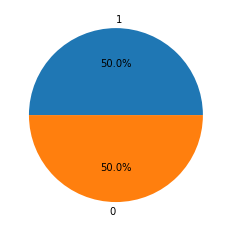

In [18]:
df_smote=y.value_counts().rename_axis("loan_status").reset_index(name="counts")
label=df_smote.loan_status
values=df_smote.counts
plt.pie(values, labels = label , autopct='%1.1f%%')


In [19]:

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.2, 
                                                    random_state=42)

In [20]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
pickle.dump(logmodel, open('log_model.p', 'wb'))

In [ ]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73        94
           1       0.66      0.89      0.76        75

    accuracy                           0.75       169
   macro avg       0.77      0.76      0.74       169
weighted avg       0.78      0.75      0.74       169



In [22]:

precision = []
recall = []
macc = []
f1 = []
precision.append(precision_score(y_test, predictions))
recall.append(recall_score(y_test, predictions))
f1.append(f1_score(y_test, predictions))
macc.append(accuracy_score(y_test, predictions))
print(f"precision_score: {precision_score(y_test, predictions)}\nrecall_score: {recall_score(y_test, predictions)}\nf1_Score: {f1_score(y_test, predictions)}\naccuracy_score: {accuracy_score(y_test, predictions)}")

precision_score: 0.7078651685393258
recall_score: 0.84
f1_Score: 0.7682926829268292
accuracy_score: 0.7751479289940828


In [23]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[68 26]
 [12 63]]


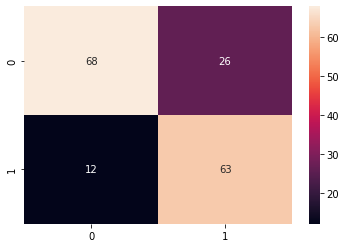

In [24]:
sns.heatmap(cf_matrix, annot=True , fmt='g')

In [25]:

roc_auc_score(y_test, predictions)

0.7817021276595744

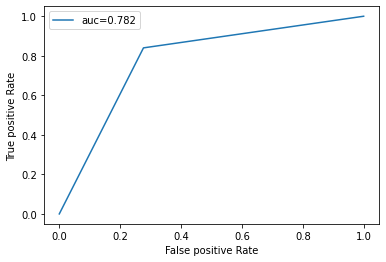

In [26]:

log_fpr,log_tpr,threshold=roc_curve(y_test,predictions)
auc_log=auc(log_fpr,log_tpr)

#plt.figure(figsize=(5,5),dpi=100)
plt.plot(log_fpr,log_tpr,label="auc=%0.3f" %auc_log)
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()

In [27]:


tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
predictions_tree = tree.predict(X_test)

In [ ]:
pickle.dump(tree, open('DTmodel.p', 'wb'))

In [28]:
precision_tree = []
recall_tree = []
macc_tree = []
f1_tree = []
precision_tree.append(precision_score(y_test, predictions_tree))
recall_tree.append(recall_score(y_test, predictions_tree))
f1_tree.append(f1_score(y_test, predictions_tree))
macc_tree.append(accuracy_score(y_test, predictions_tree))
print(f"precision_score: {precision_score(y_test, predictions_tree)}\nrecall_score: {recall_score(y_test, predictions_tree)}\nf1_Score: {f1_score(y_test, predictions_tree)}\naccuracy_score: {accuracy_score(y_test, predictions_tree)}")

precision_score: 0.8169014084507042
recall_score: 0.7733333333333333
f1_Score: 0.7945205479452055
accuracy_score: 0.8224852071005917


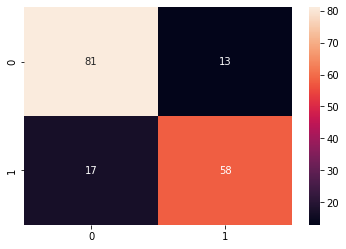

In [29]:
cf_matrix = confusion_matrix(y_test, predictions_tree)
sns.heatmap(cf_matrix, annot=True , fmt='g')

In [ ]:
def plot_auc(fpr,tpr,auc):
   plt.plot(fpr,tpr,label="auc=%0.3f" %auc)
   plt.xlabel("False positive Rate")
   plt.ylabel("True positive Rate")
   plt.legend()
   plt.show()

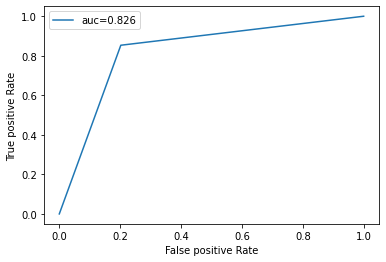

In [ ]:
tree_fpr,tree_tpr,threshold=roc_curve(y_test,predictions_tree)
auc_tree=auc(tree_fpr,tree_tpr)
plot_auc(tree_fpr,tree_tpr,auc_tree)

In [30]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)


In [ ]:
pickle.dump(knn, open('KNNmodel.p', 'wb'))

In [32]:
def results(predictions):
   precision = []
   recall = []
   macc = []
   f1 = []
   precision.append(precision_score(y_test, predictions))
   recall.append(recall_score(y_test, predictions))
   f1.append(f1_score(y_test, predictions))
   macc.append(accuracy_score(y_test, predictions))
   print(f"precision_score: {precision_score(y_test, predictions)}\nrecall_score: {recall_score(y_test, predictions)}\nf1_Score: {f1_score(y_test, predictions)}\naccuracy_score: {accuracy_score(y_test, predictions)}")

In [33]:
results(predictions_knn)

precision_score: 0.691358024691358
recall_score: 0.7466666666666667
f1_Score: 0.717948717948718
accuracy_score: 0.7396449704142012


[[69 25]
 [19 56]]


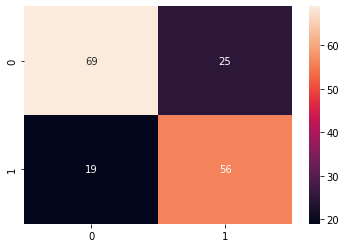

In [35]:
cf_matrix = confusion_matrix(y_test, predictions_knn)
sns.heatmap(cf_matrix, annot=True , fmt='g')
print(cf_matrix)

In [ ]:
roc_auc_score(y_test, predictions_knn)

0.6724822695035462

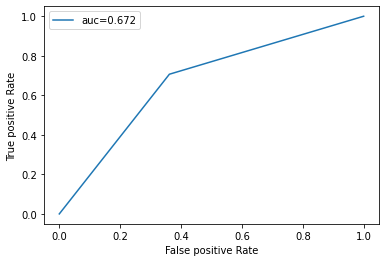

In [ ]:
knn_fpr,knn_tpr,threshold=roc_curve(y_test,predictions_knn)
auc_knn=auc(knn_fpr,knn_tpr)
plot_auc(knn_fpr,knn_tpr,auc_knn)

In [ ]:

svm_alg = SVC(kernel='linear')
svm_alg.fit(X_train, y_train)
predictions_svm = svm_alg.predict(X_test)

In [ ]:
pickle.dump(svm_alg, open('SVM_modedl.p', 'wb'))

In [ ]:

results(predictions_svm)

precision_score: 0.6458333333333334
recall_score: 0.8266666666666667
f1_Score: 0.7251461988304094
accuracy_score: 0.7218934911242604


[[60 34]
 [13 62]]


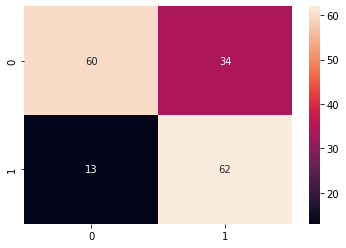

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cf_matrix, annot=True , fmt='g')
print(cf_matrix)

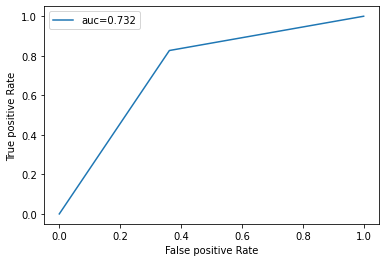

In [ ]:
svm_fpr,svm_tpr,threshold=roc_curve(y_test,predictions_svm)
auc_svm=auc(svm_fpr,svm_tpr)
plot_auc(svm_fpr,svm_tpr,auc_svm)

In [ ]:

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
predictions_bayes = gaussian.predict(X_test)

In [ ]:

pickle.dump(gaussian, open('gaussian_model.p', 'wb'))

In [ ]:
results(predictions_bayes)

precision_score: 0.6153846153846154
recall_score: 0.96
f1_Score: 0.7500000000000001
accuracy_score: 0.7159763313609467


[[49 45]
 [ 3 72]]


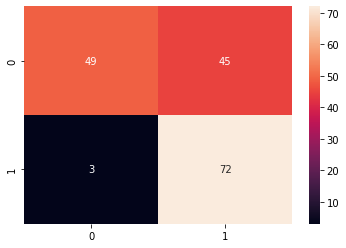

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions_bayes)
sns.heatmap(cf_matrix, annot=True , fmt='g')
print(cf_matrix)

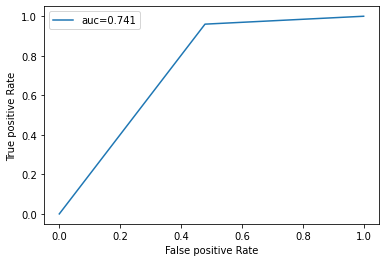

In [ ]:
bayes_fpr,bayes_tpr,threshold=roc_curve(y_test,predictions_bayes)
auc_bayes=auc(bayes_fpr,bayes_tpr)
plot_auc(bayes_fpr,bayes_tpr,auc_bayes)

In [ ]:
def predictResult(x,filename):
  loaded_model = pickle.load(open(filename+'.p', 'rb'))
  h=loaded_model.predict(x)
  if h==1:
    return "Yes"
  else:
    return "No"



In [ ]:
z=[[0,1,2,1,0,4006,1526,168,360,1]]
p=predictResult(z,'gaussian_model')
print(p)


Yes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
